For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?
Reworded: Is there a difference in network latency since we switched internet service providers?

**Null Hypthesis:** There is no difference in network latency since we switched

**Alternative Hypothesis:** There is a difference in network latency

**True Positive:** There is a difference in network latency

**True Negative:** There is no difference in network latency

**Type I Error:** Network latency has gone up since switching when it actually hasn't

**Type II Error:** There is no difference in network latency when there really is

2. Is the website redesign any good?
Has the website redesign increased customer traffic?

**Null Hypthesis:** The website redesign has not increased customer traffic

**Alternative Hypothesis:** The website redesign has increased customer traffic

**True Positive:** The website redesign has increased customer traffic

**True Negative:** The website redesign has not increased customer traffic

**Type I Error:** The website redesign has increased customer traffic when it hasn't

**Type II Error:** The website redesign has not increased customer traffic when it has

3. Is our television ad driving more sales?
Have sales been impacted since we put oout the new television ad?

**Null Hypthesis:** Sales have not been impacted by the television ad

**Alternative Hypothesis:** Sales have been impacted by the television ad

**True Positive:** Sales have been impacted by the television ad

**True Negative:** Sales have not been impacted by the television ad

**Type I Error:** Sales have been impacted by the television ad when they really haven't

**Type II Error:** Sales have not been impacted by the television ad when they really have

### T-Test

In [14]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [42]:
alpha = 0.05

In [43]:
t,p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50)
t,p,alpha

(-2.6252287036468456, 0.01020985244923939, 0.05)

2. Load the mpg dataset and use it to answer the following questions:

In [17]:
mpg = data('mpg')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
81,ford,explorer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv
226,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact
169,subaru,impreza awd,2.5,1999,4,auto(l4),4,19,26,r,subcompact


a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Step 1.

See below

Step 2.

Null Hypothesis: Fuel efficiency in cars from 2008 vs 1999 is the same.

Alternate Hypothesis: Fuel efficiency in cars from 2008 vs 1999 is different

Step 3. See below

Step 4.

- More than 30 observations
- independent samples
- Fairly equal variance

In [29]:
mpg['mpg'] = round((mpg.cty + mpg.hwy) / 2).astype(int)
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38
22,chevrolet,c1500 suburban 2wd,5.7,1999,8,auto(l4),r,13,17,r,suv,15
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,10
125,jeep,grand cherokee 4wd,4.0,1999,6,auto(l4),4,15,20,r,suv,18
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32


<AxesSubplot:>

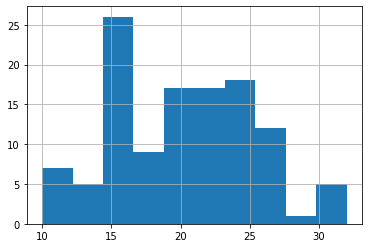

In [52]:
#Step 1
cars_2008 = mpg[mpg.year == 2008].mpg
cars_2008.hist()

<AxesSubplot:>

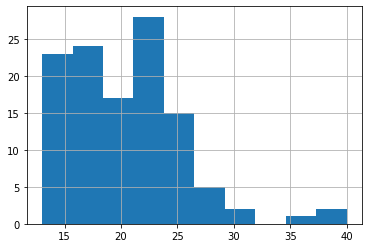

In [53]:
#Step 1
cars_1999 = mpg[mpg.year == 1999].mpg
cars_1999.hist()

In [54]:
#Step 3
alpha = 0.05

In [55]:
#Step 4
cars_2008.var(), cars_1999.var()

(24.8745947539051, 26.351458885941646)

In [56]:
#Step 5
t,p = stats.ttest_ind(cars_2008, cars_1999)
t,p,alpha

(-0.24542297716258815, 0.8063459014623406, 0.05)

Step 6

We fail to reject the null hypothesis.

b. Are compact cars more fuel-efficient than the average car?

Step 1.

See below

Step 2.

Null Hypothesis: Fuel efficiency in compact cars is <= fuel efficiency in the average car.

Alternate Hypothesis: Fuel efficiency in compact cars is > fuel efficiency in the average car.

Step 3. See below

Step 4.

- More than 30 observations
- one sample T-test

<AxesSubplot:>

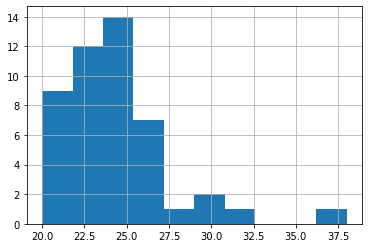

In [47]:
compact_cars = mpg[mpg['class'] == 'compact'].mpg
compact_cars.hist()

<AxesSubplot:>

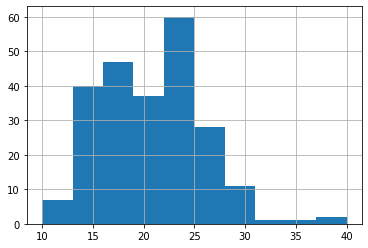

In [49]:
average_cars = mpg.mpg
average_cars.hist()

In [62]:
average_cars.sample(10)

149    22
43     20
21     17
200    16
185    22
131    13
194    27
30     12
9      20
83     15
Name: mpg, dtype: int64

In [57]:
#Step 3
alpha = 0.05

In [63]:
#Step 4
t,p = stats.ttest_1samp(compact_cars, average_cars.mean())
t, p, alpha

(7.900972010653462, 4.1406369298935154e-10, 0.05)

Step 5

We reject the null hypothesis

c. Do manual cars get better gas mileage than automatic cars?

<AxesSubplot:>

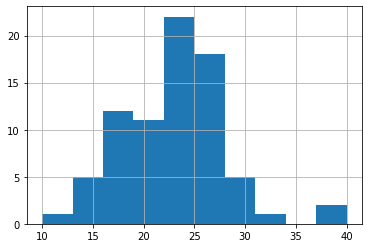

In [69]:
manual_mpg = mpg[mpg.trans.str.startswith('man')].mpg
manual_mpg.hist()

<AxesSubplot:>

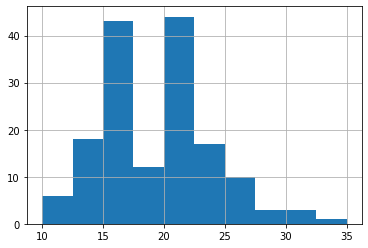

In [72]:
automatic_mpg = mpg[mpg.trans.str.startswith('auto')].mpg
automatic_mpg.hist()

Null Hypthesis: Manual cars get <= gas mileage than automatic cars.

Alternate Hypothesis: Manual cars get > gas mileage than automatic cars.

In [74]:
alpha = 0.05

In [73]:
len(manual_mpg), len(automatic_mpg)

(77, 157)

In [75]:
manual_mpg.var(), automatic_mpg.var()

(26.38482570061516, 22.09096847950349)

In [76]:
t, p = stats.ttest_ind(manual_mpg, automatic_mpg, equal_var=False)
t, p, alpha

(4.440186128357423, 1.8115608289436676e-05, 0.05)

We reject the null hypothesis.